In [137]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")

import shapely

In [138]:
df = pd.read_csv("nc-block-group-centroids-populations-2010.txt")

In [139]:
df.head()

STATEFP  COUNTYFP  TRACTCE  BLKGRPCE  POPULATION   LATITUDE  LONGITUDE
0       37         1    20100         1        1360  36.099206 -79.447665
1       37         1    20100         2        1210  36.092317 -79.450464
2       37         1    20100         3         825  36.084728 -79.443690
3       37         1    20100         4         513  36.093151 -79.437059
4       37         1    20200         1         956  36.090557 -79.413092

In [140]:
df.describe()

STATEFP     COUNTYFP        TRACTCE     BLKGRPCE   POPULATION  \
count   6155.0  6155.000000    6155.000000  6155.000000  6155.000000   
mean      37.0   101.876686  278360.614297     2.113404  1549.225508   
std        0.0    55.154402  413728.937367     1.119366   788.913099   
min       37.0     1.000000     100.000000     0.000000     0.000000   
25%       37.0    57.000000    5916.000000     1.000000  1003.500000   
50%       37.0   101.000000   32100.000000     2.000000  1398.000000   
75%       37.0   151.000000  920500.000000     3.000000  1924.000000   
max       37.0   199.000000  990200.000000     7.000000  8745.000000   

          LATITUDE    LONGITUDE  
count  6155.000000  6155.000000  
mean     35.541683   -79.682594  
std       0.540500     1.626169  
min      33.862281   -84.257708  
25%      35.210047   -80.835476  
50%      35.591684   -79.775380  
75%      35.958808   -78.577851  
max      36.552522   -75.446758

In [141]:
np.sum(df["POPULATION"])

9535483

In [142]:
np.average(df["LONGITUDE"], weights=df["POPULATION"])

-79.658912054737556

In [143]:
np.std(df["LONGITUDE"])

1.6260364924437316

In [144]:
np.average(df["LATITUDE"], weights=df["POPULATION"])

35.543074967296363

In [145]:
np.std(df["LATITUDE"])

0.5404561739476097

In [146]:
from map_projection import nc_lambert
project = nc_lambert.project

In [147]:
xs, ys = project(df["LATITUDE"], df["LONGITUDE"])
xs = xs - np.mean(xs)
ys = ys - np.mean(ys)
df['x'] = xs
df['y'] = ys

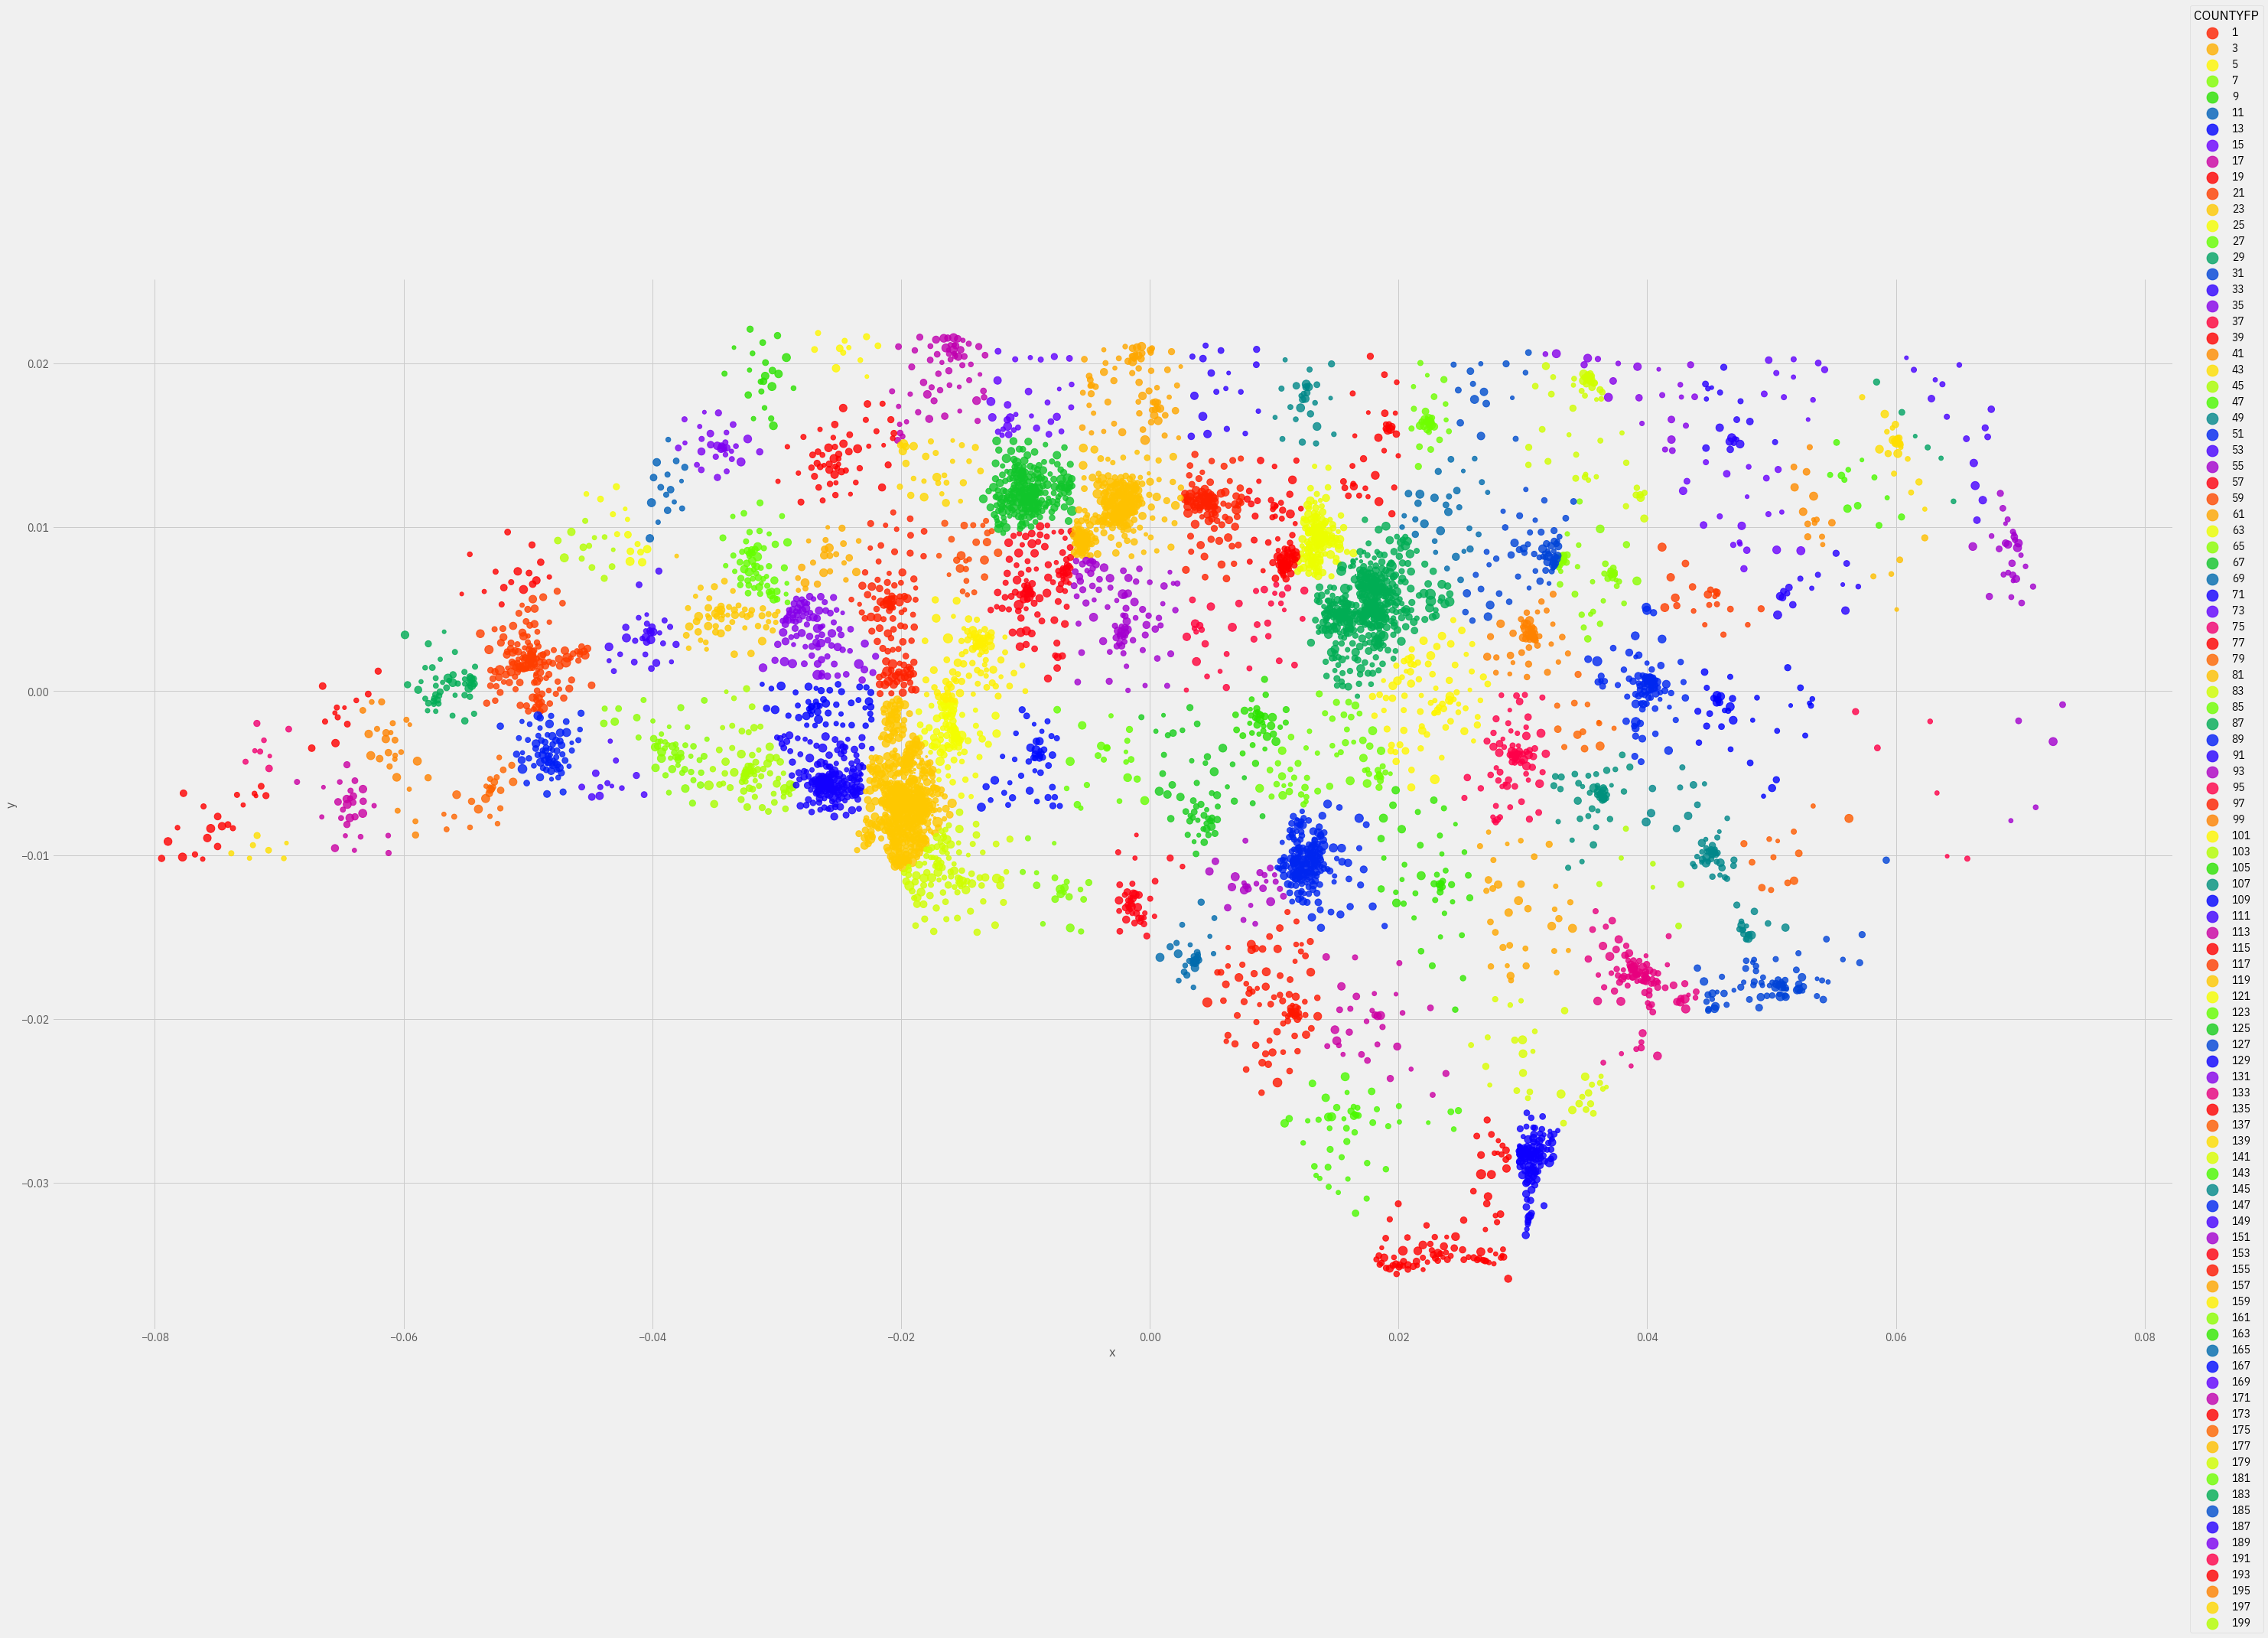

In [148]:
sns.lmplot('x', 'y', df, fit_reg=False, hue='COUNTYFP', palette="prism", scatter=True, size=20, aspect=2, scatter_kws={'s': df["POPULATION"] / 20})

In [149]:
baf = pd.read_csv("BlockAssign_ST37_NC_CD.txt")

In [150]:
baf.head()

BLOCKID  DISTRICT
0  370010201001000         6
1  370010201001001         6
2  370010201001002         6
3  370010201001003         6
4  370010201001004         6

In [151]:
blk_shape = gpd.read_file("shapefiles/tabblock2010_37_pophu.shp")

In [152]:
blk_shape.head()

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        37        001    021801    2010  370010218012010       N          0   
1        37        001    021801    2013  370010218012013       N          0   
2        37        001    021801    2009  370010218012009       N          0   
3        37        001    021801    2001  370010218012001       N          0   
4        37        001    021206    3007  370010212063007       N          0   

   POP10                                           geometry  
0      0  POLYGON ((-79.48484599999999 35.99757, -79.484...  
1      0  POLYGON ((-79.478807 35.999981, -79.478971 35....  
2      0  POLYGON ((-79.474141 36.005681, -79.474081 36....  
3      0  POLYGON ((-79.46624299999999 36.002165, -79.46...  
4      0  POLYGON ((-79.270354 36.095262, -79.270521 36....

In [153]:
blk_shape[blk_shape["POP10"] > 0].describe()

HOUSING10          POP10
count  185219.000000  185219.000000
mean       23.280074      51.482208
std        42.777163      96.434037
min         0.000000       1.000000
25%         5.000000       9.000000
50%        11.000000      24.000000
75%        25.000000      55.000000
max      1634.000000    4687.000000

In [196]:
bdf = blk_shape.copy()

In [197]:
bdf.geometry = bdf["geometry"].centroid
bdf.crs = blk_shape.crs
bdf["BLOCKID10"] = pd.to_numeric(bdf["BLOCKID10"])

In [198]:
#standard NC projection, least distortion
nc_proj = "+proj=lcc +lat_1=34.33333333333334 +lat_2=36.16666666666666 +lat_0=33.75 +lon_0=-79 +x_0=609601.2199999999 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs "
bdf.to_crs(nc_proj, inplace=True)

In [199]:
bdf.head()

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        37        001    021801    2010  370010218012010       N          0   
1        37        001    021801    2013  370010218012013       N          0   
2        37        001    021801    2009  370010218012009       N          0   
3        37        001    021801    2001  370010218012001       N          0   
4        37        001    021206    3007  370010212063007       N          0   

   POP10                                     geometry  
0      0  POINT (1855812.390409091 818242.9299537031)  
1      0  POINT (1858445.049930417 819204.4356415076)  
2      0  POINT (1859301.490943947 820376.6421651999)  
3      0  POINT (1862878.510812793 820639.6035401359)  
4      0  POINT (1920007.586220435 853969.3337025587)

In [200]:
bdf.crs

'+proj=lcc +lat_1=34.33333333333334 +lat_2=36.16666666666666 +lat_0=33.75 +lon_0=-79 +x_0=609601.2199999999 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs '

In [201]:
bdf = pd.merge(bdf, baf, left_on="BLOCKID10", right_on="BLOCKID")

In [202]:
bdf.head()

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        37        001    021801    2010  370010218012010       N          0   
1        37        001    021801    2013  370010218012013       N          0   
2        37        001    021801    2009  370010218012009       N          0   
3        37        001    021801    2001  370010218012001       N          0   
4        37        001    021206    3007  370010212063007       N          0   

   POP10                                     geometry          BLOCKID  \
0      0  POINT (1855812.390409091 818242.9299537031)  370010218012010   
1      0  POINT (1858445.049930417 819204.4356415076)  370010218012013   
2      0  POINT (1859301.490943947 820376.6421651999)  370010218012009   
3      0  POINT (1862878.510812793 820639.6035401359)  370010218012001   
4      0  POINT (1920007.586220435 853969.3337025587)  370010212063007   

   DISTRICT  
0         6  
1         6  
2         6  
3         6  
4         6

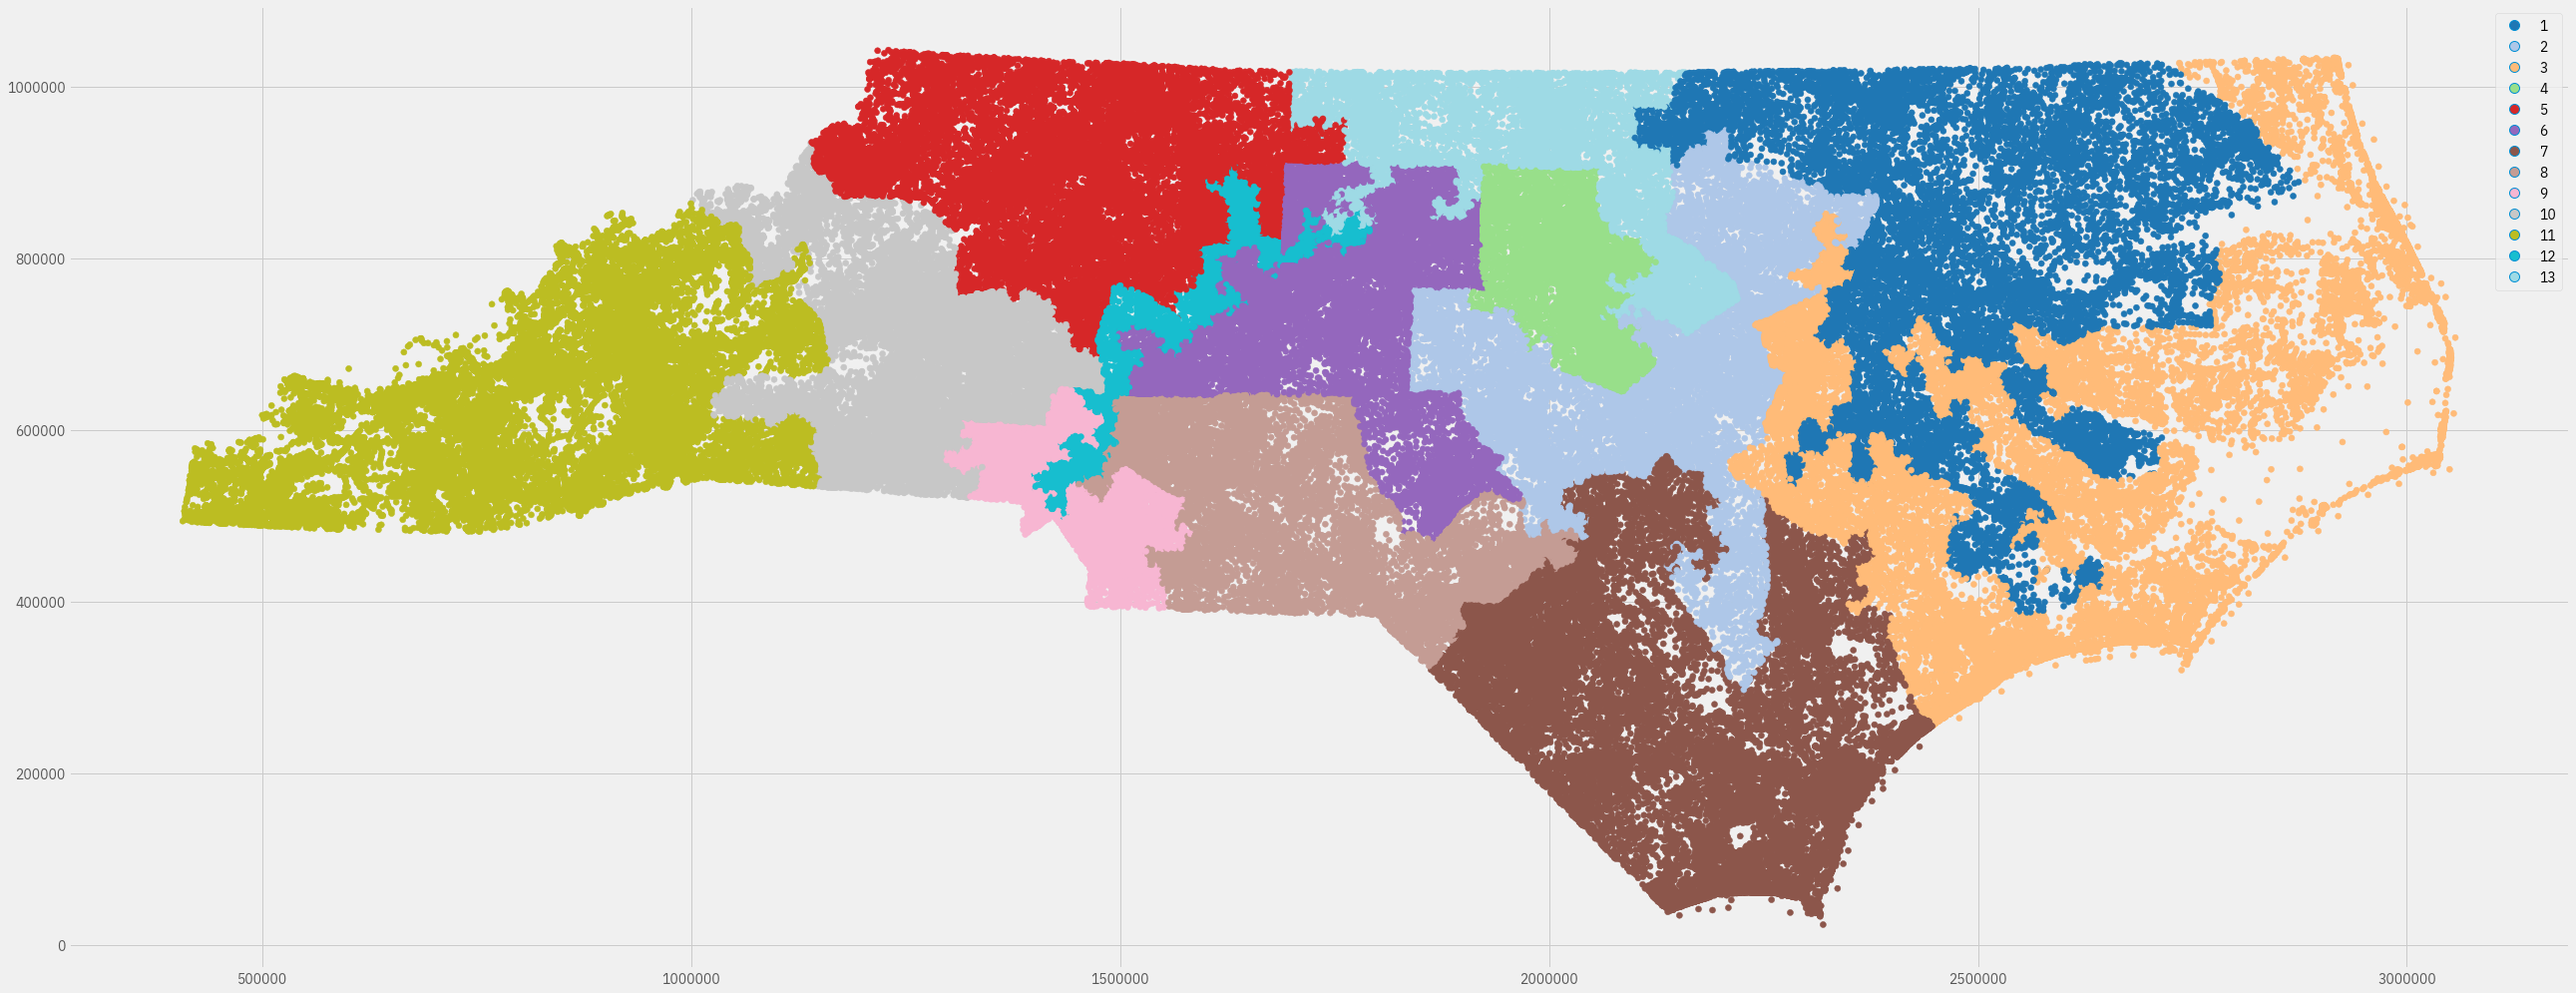

In [161]:
bdf.plot(column="DISTRICT", categorical=True, figsize=(40, 20), legend=True, cmap="tab20")

In [162]:
points = shapely.geometry.MultiPoint(bdf["geometry"])

In [203]:
bdf['x'] = [p.x for p in bdf["geometry"]]
bdf['y'] = [p.y for p in bdf["geometry"]]

norm = max(bdf['x']) - min(bdf['x'])
bdf['x'] /= norm
bdf['y'] /= norm
bdf['x'] -= min(bdf['x'])
bdf['y'] -= min(bdf['y'])

# normalized to 0-1 on x-axis, preserving scale between x and y

In [204]:
bdf.describe()

BLOCKID10      HOUSING10          POP10       BLOCKID  \
count  2.889870e+05  288987.000000  288987.000000  2.889870e+05   
mean   3.710012e+14      14.974819      32.996235  3.710012e+14   
std    5.630002e+11      36.008857      81.057112  5.630002e+11   
min    3.700102e+14       0.000000       0.000000  3.700102e+14   
25%    3.705100e+14       0.000000       0.000000  3.705100e+14   
50%    3.709706e+14       4.000000       7.000000  3.709706e+14   
75%    3.715103e+14      16.000000      34.000000  3.715103e+14   
max    3.719996e+14    1634.000000    4687.000000  3.719996e+14   

            DISTRICT              x              y  
count  288987.000000  288987.000000  288987.000000  
mean        6.932042       0.517397       0.235492  
std         3.691494       0.205369       0.077773  
min         1.000000       0.000000       0.000000  
25%         4.000000       0.379075       0.191273  
50%         7.000000       0.520119       0.242572  
75%        10.000000       0.670115       0.294120  
max        13.000000       1.000000       0.384709

In [165]:
mat = bdf[['x', 'y']].values
mat

array([[ 0.54680117,  0.29998236],
       [ 0.54779485,  0.30034527],
       [ 0.54811811,  0.30078771],
       ..., 
       [ 0.23417718,  0.2712213 ],
       [ 0.23228014,  0.2978613 ],
       [ 0.23534315,  0.30894059]])

In [166]:
def dist(p1, p2):
    return np.sum(np.power(p1 - p2, 2), 1)

In [167]:
def pop_com(mat, pop):
    """Given a set of points and populations, as numpy ndarray and a series of equal length, computes the population-weighted center of mass."""
    return np.average(mat, weights=pop, axis=0)

In [168]:
def pop_imbalance(mat, pop):
    """Given a set of points and populations, as a numpy ndarray and series of equal length, computes the population-weighted total distance to the population-weighted center of mass."""
    return np.sum(dist(mat, pop_com(mat, pop)) * pop)

In [169]:
pop = bdf['POP10']

In [170]:
pop_com(mat, pop)

array([ 0.52732956,  0.23908376])

In [171]:
pop_imbalance(mat, pop)

342324.85126713035

In [172]:
def df_pop_imbalance(df, x, y, pop):
    """Given a dataframe with the given columns, returns the population imbalance."""
    mat = df[[x, y]].values
    return pop_imbalance(mat, df[pop])

In [173]:
def compactness(df, x='x', y='y', district='DISTRICT', pop="POP10"):
    """Implements the population COM compactness measure: the sum of the population imbalances for each district, divided both by the number of districts and the score of a single-district plan."""
    if any([var not in df.columns for var in (x, y, district, pop)]):
        raise ValueError("{} not in DataFrame!".format(var))
    district_nums = pd.unique(df[district])
    n = len(district_nums)
    district_scores = 0
    for d in sorted(district_nums):
        district_scores += df_pop_imbalance(df[df[district] == d], x, y, pop)
    one_dist_score = df_pop_imbalance(df, x, y, pop)
    return district_scores / (n * one_dist_score)

In [174]:
compactness(bdf)

0.0089426626138587491

In [175]:
cd115 = pd.read_csv("shapefiles/37_NC_CD115.txt")

In [176]:
cd115.head()

BLOCKID  CD115
0  370010205012023      6
1  370010205012019      6
2  370010205012038      6
3  370010205012027      6
4  370010216002004      6

In [205]:
bdf = pd.merge(bdf, cd115, left_on="BLOCKID10", right_on="BLOCKID")

In [206]:
bdf.head()

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        37        001    021801    2010  370010218012010       N          0   
1        37        001    021801    2013  370010218012013       N          0   
2        37        001    021801    2009  370010218012009       N          0   
3        37        001    021801    2001  370010218012001       N          0   
4        37        001    021206    3007  370010212063007       N          0   

   POP10                                     geometry        BLOCKID_x  \
0      0  POINT (1855812.390409091 818242.9299537031)  370010218012010   
1      0  POINT (1858445.049930417 819204.4356415076)  370010218012013   
2      0  POINT (1859301.490943947 820376.6421651999)  370010218012009   
3      0  POINT (1862878.510812793 820639.6035401359)  370010218012001   
4      0  POINT (1920007.586220435 853969.3337025587)  370010212063007   

   DISTRICT         x         y        BLOCKID_y  CD115  
0         6  0.546801  0.299982  370010218012010      6  
1         6  0.547795  0.300345  370010218012013      6  
2         6  0.548118  0.300788  370010218012009      6  
3         6  0.549468  0.300887  370010218012001      6  
4         6  0.571031  0.313467  370010212063007      6

In [179]:
compactness(bdf, district="CD115")

0.010313740071120498

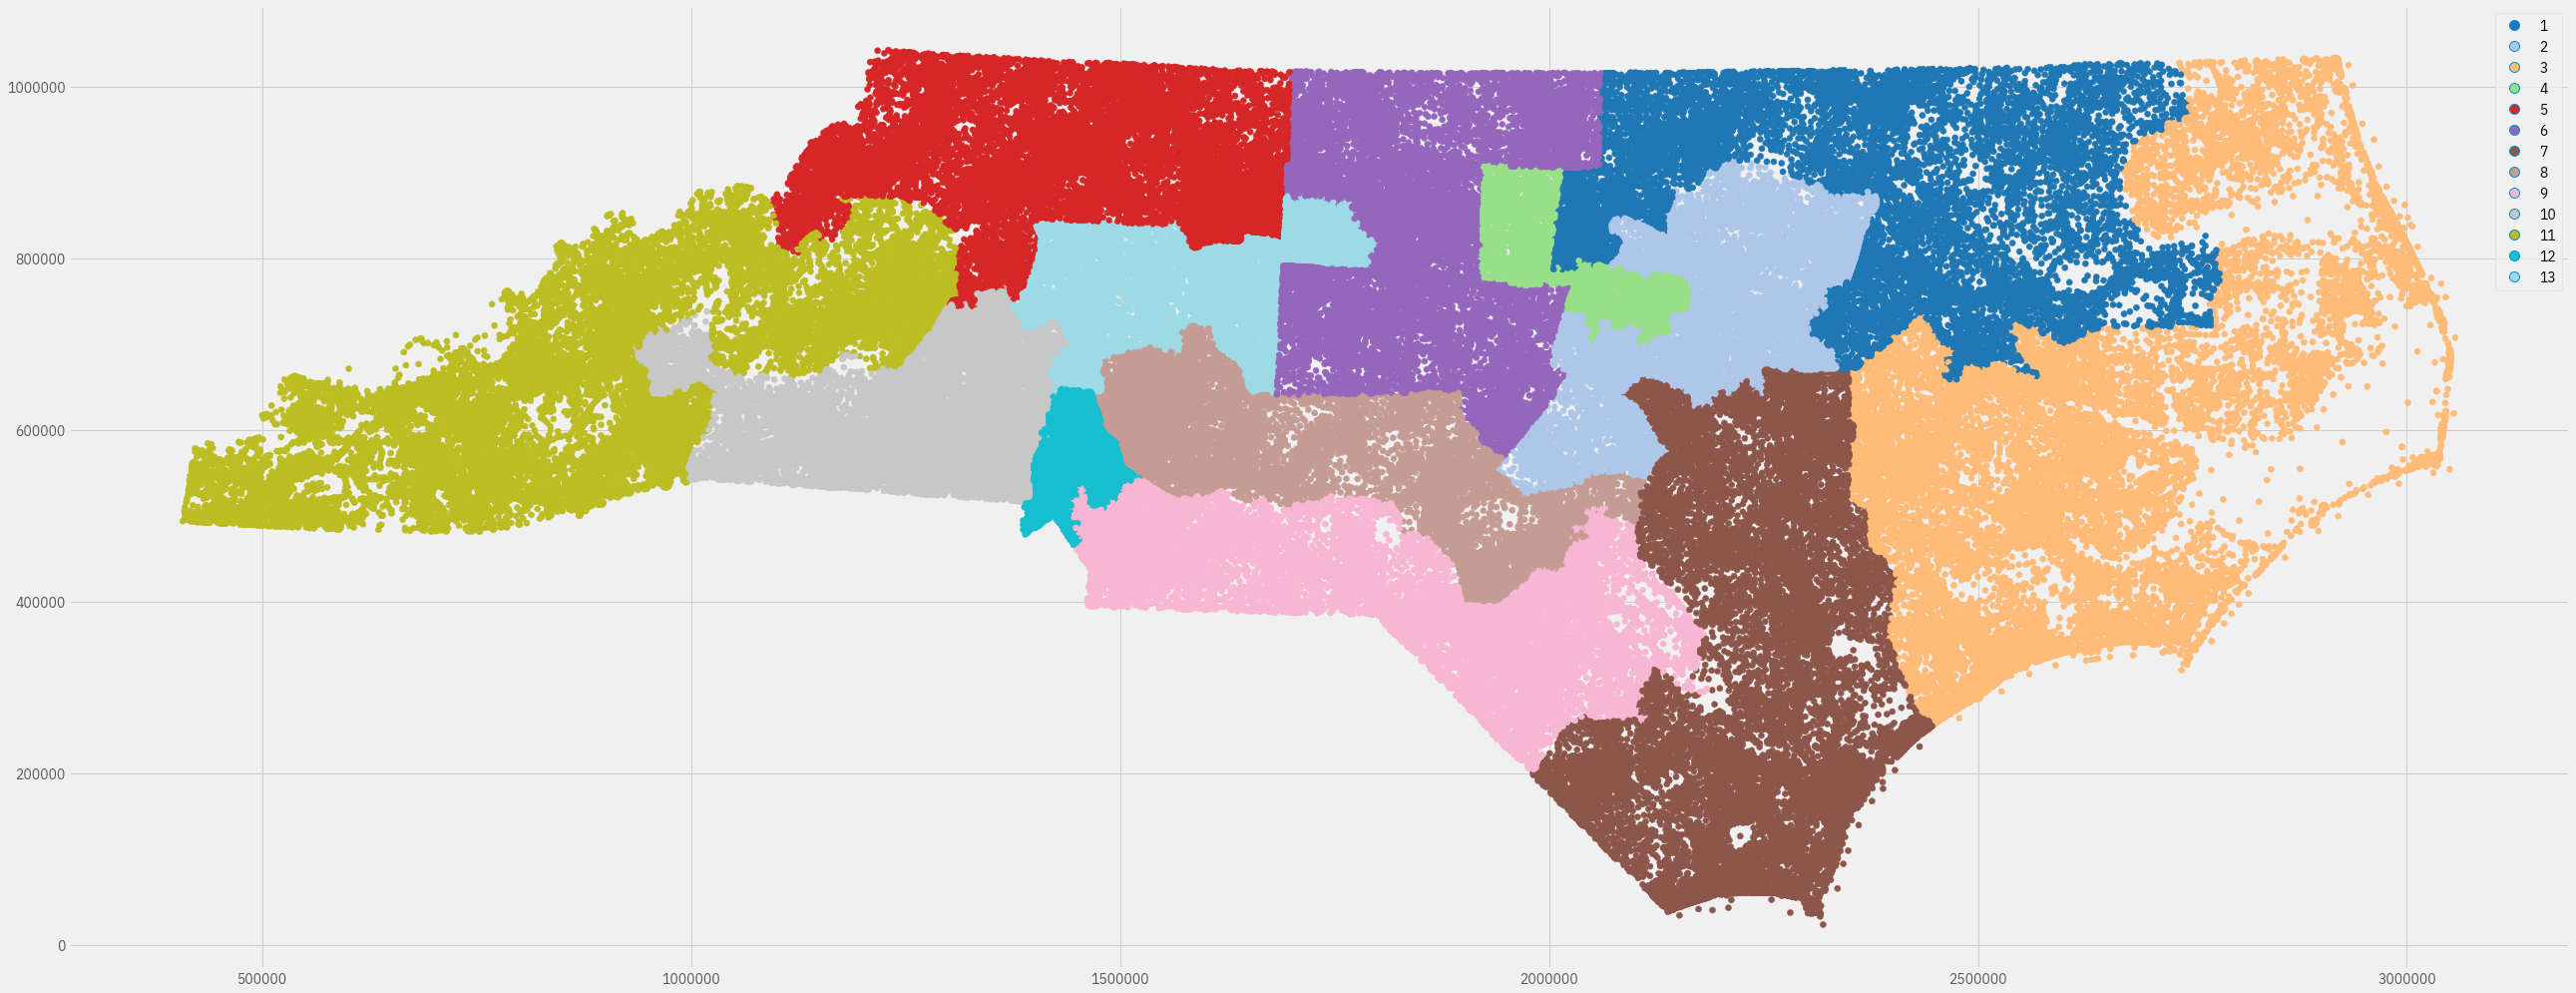

In [180]:
bdf.plot(column="CD115", categorical=True, figsize=(40, 20), legend=True, cmap="tab20")

In [181]:
cd113 = pd.read_csv("shapefiles/37_NC_CD113.txt")

In [207]:
bdf = pd.merge(bdf, cd113, left_on="BLOCKID10", right_on="BLOCKID")

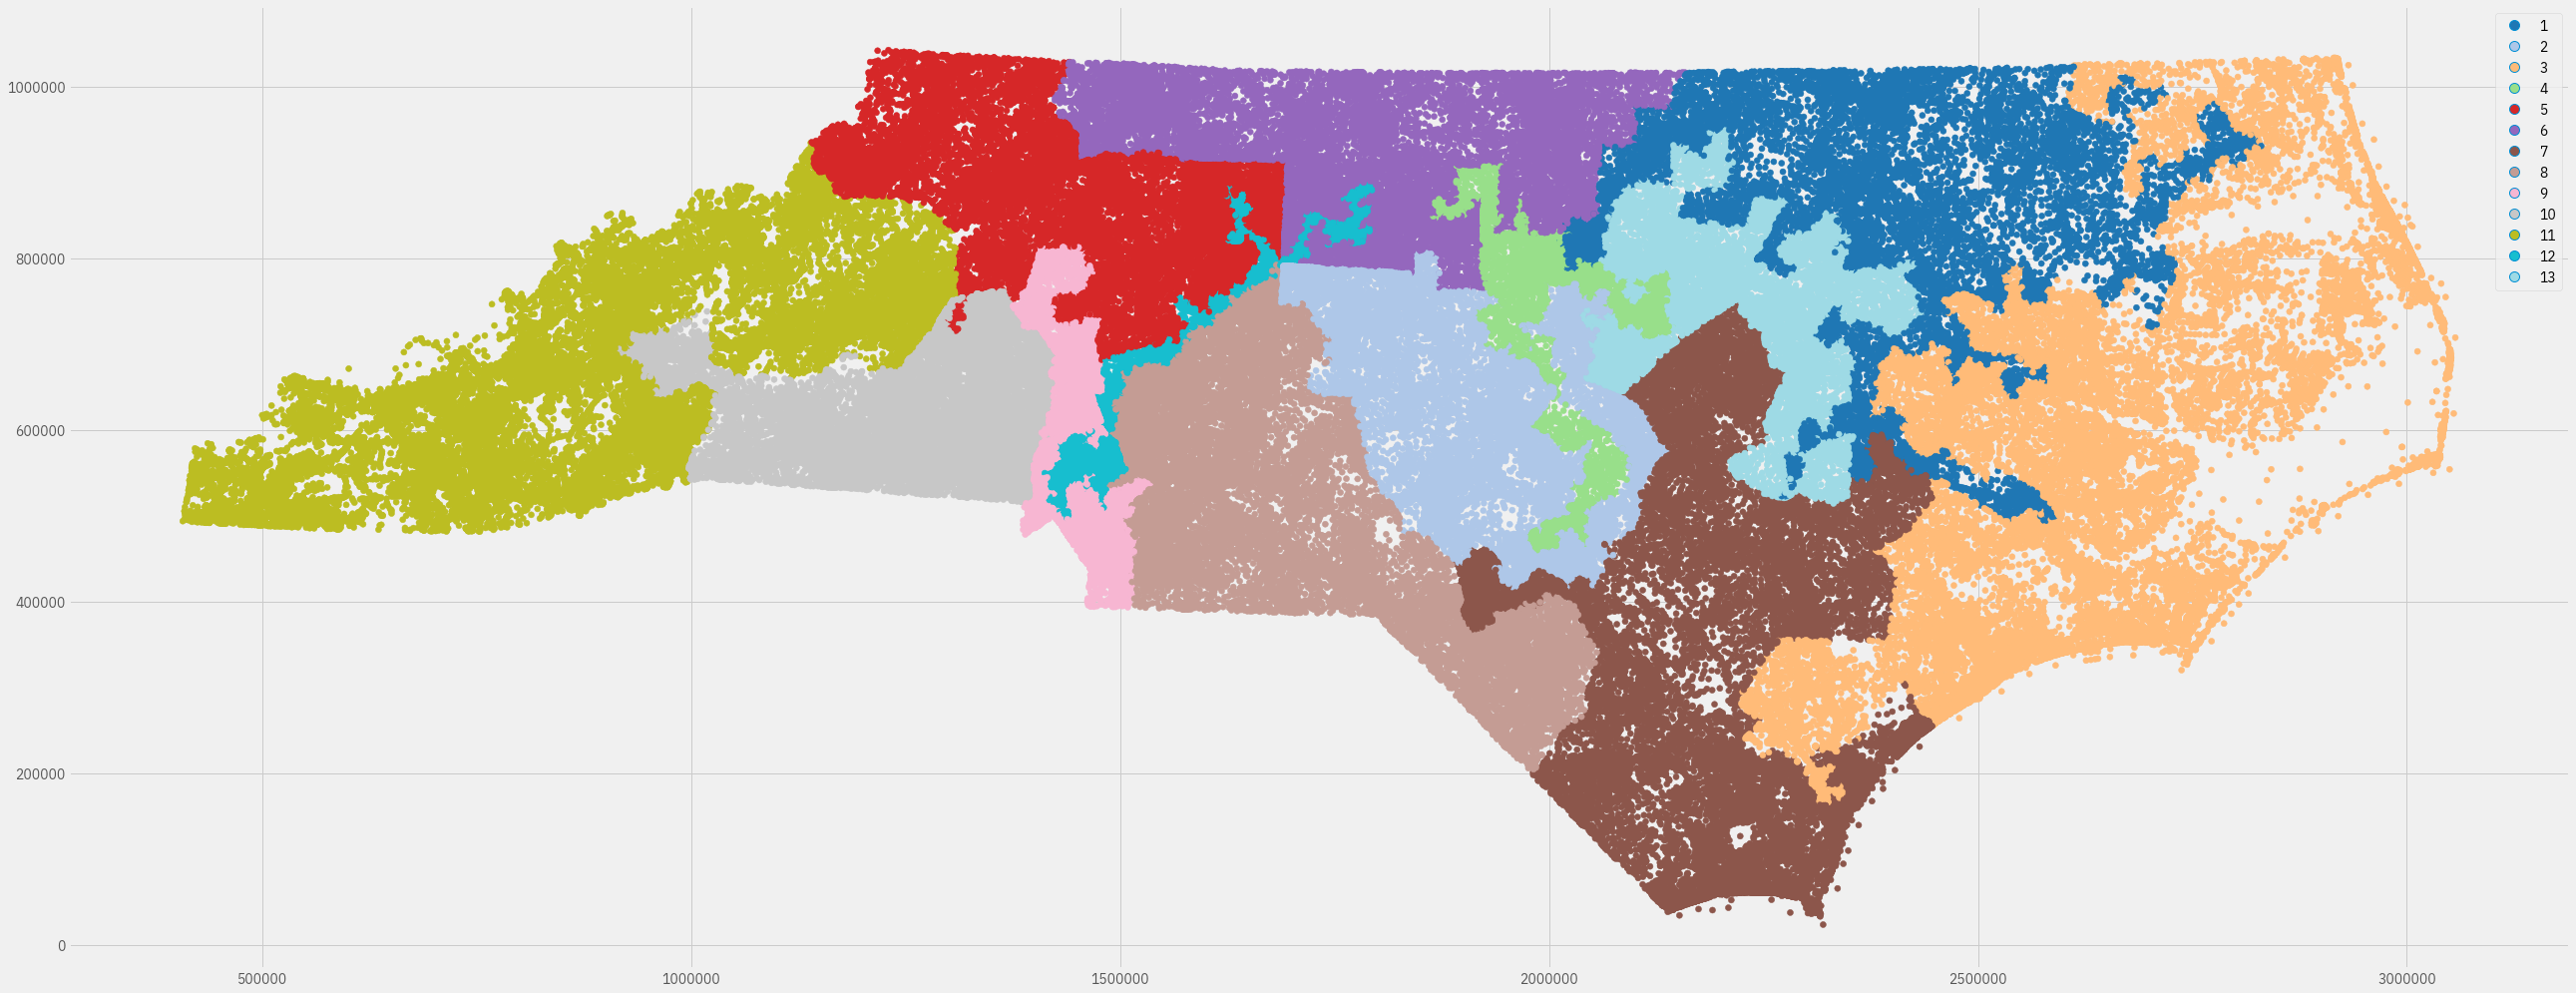

In [183]:
bdf.plot(column="CD113", categorical=True, figsize=(40, 20), legend=True, cmap="tab20")

In [184]:
compactness(bdf, district="CD113")

0.011086081865832403

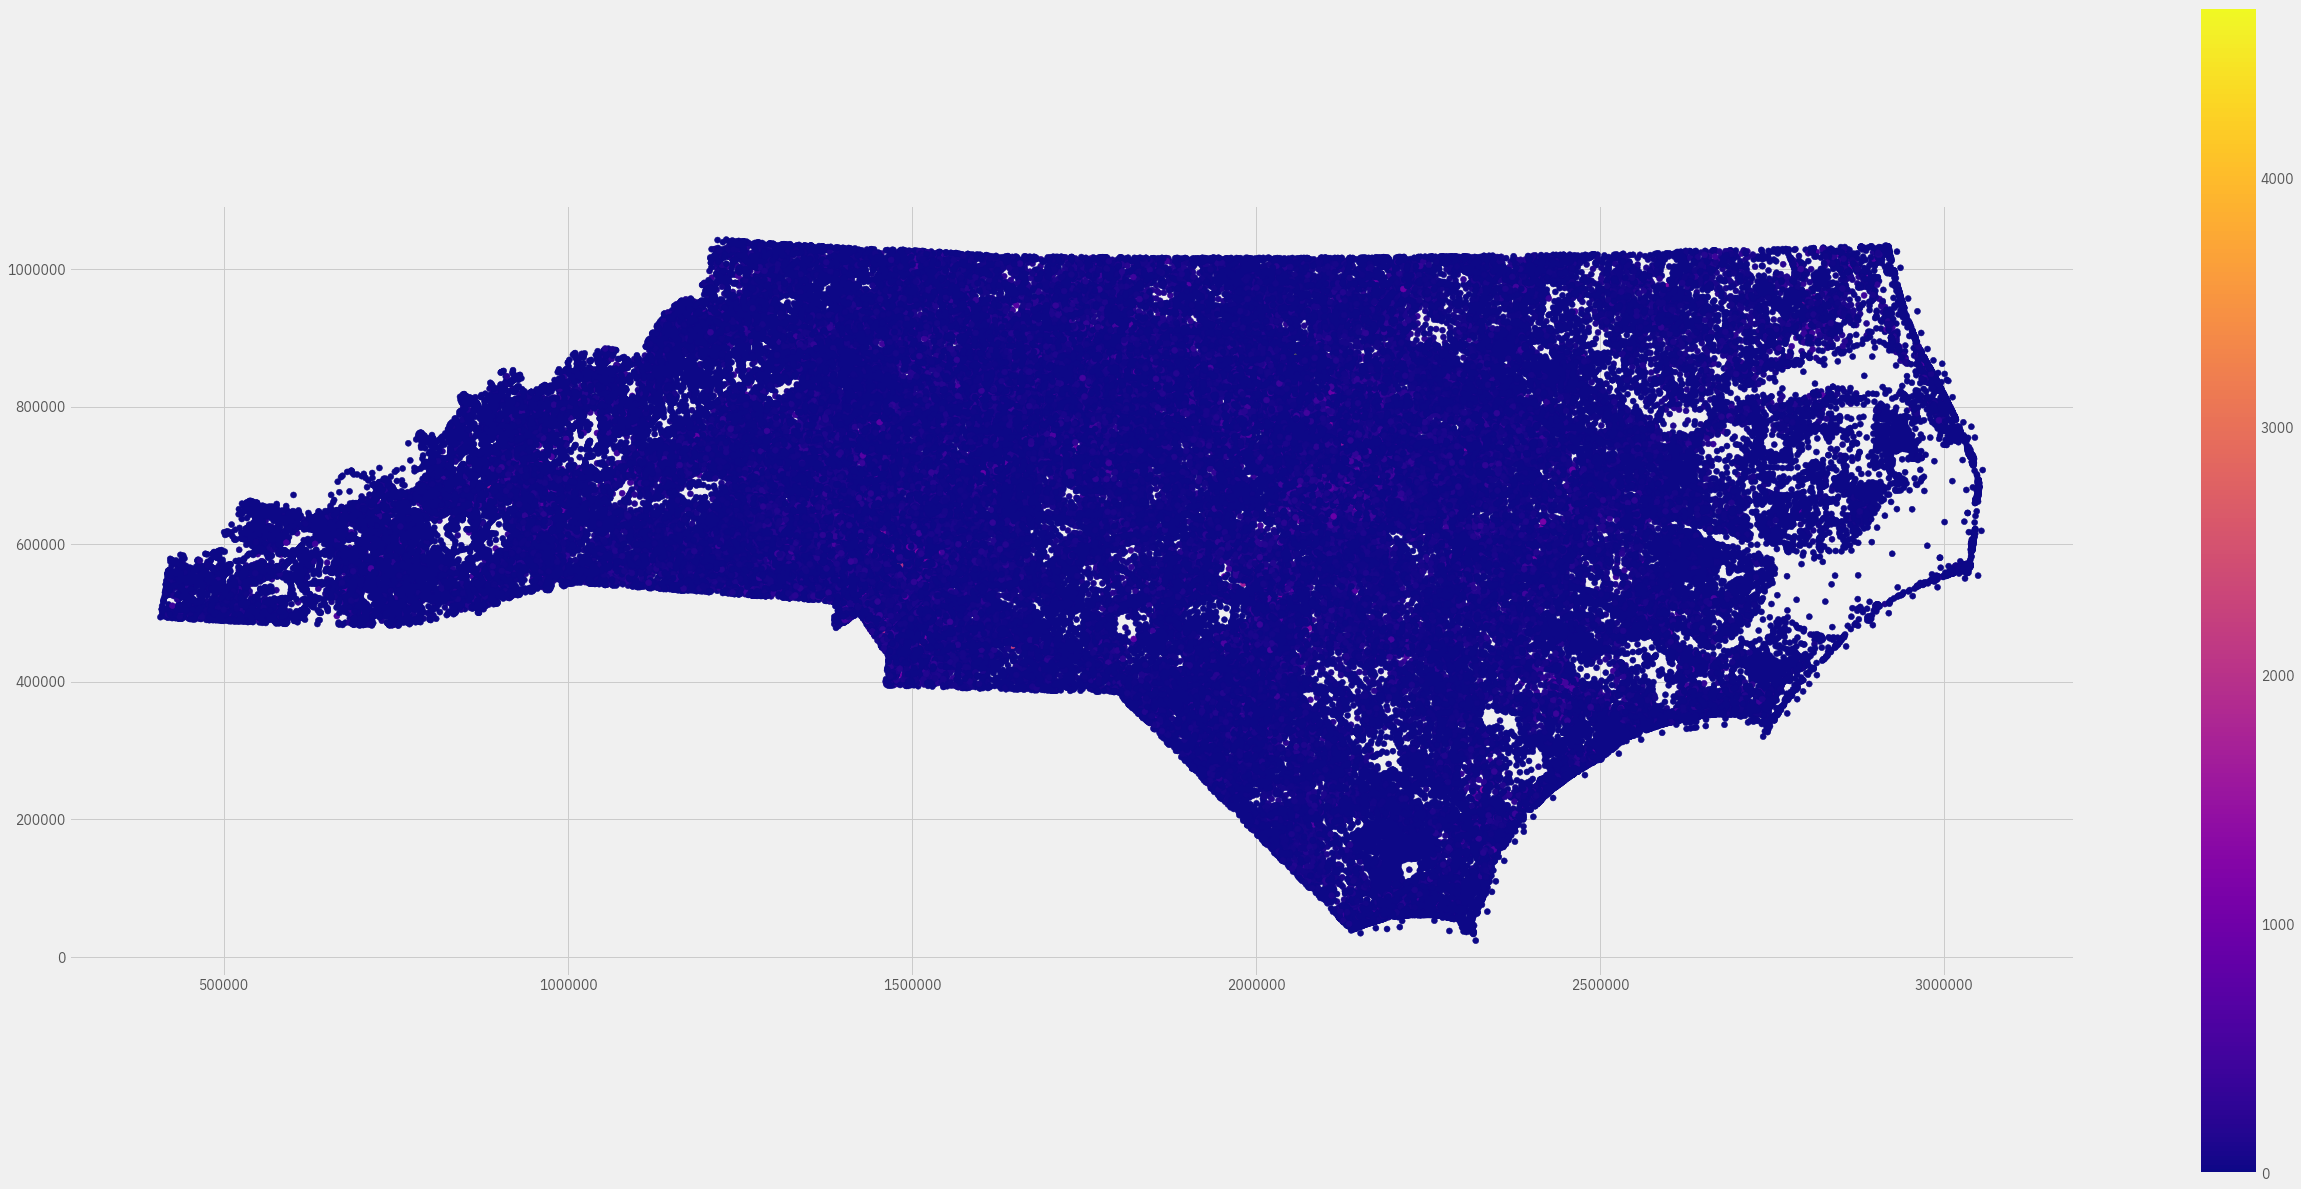

In [185]:
bdf.plot(column="POP10", figsize=(40, 20), legend=True, cmap="plasma")

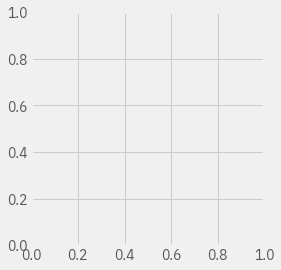

In [186]:
nc_pop = bdf[['TRACTCE10', 'geometry', 'POP10']].dissolve(by="TRACTCE10", aggfunc="sum", as_index=False)
nc_pop.plot(column='POP10', cmap='viridis')

In [214]:
bdf.head()

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        37        001    021801    2010  370010218012010       N          0   
1        37        001    021801    2013  370010218012013       N          0   
2        37        001    021801    2009  370010218012009       N          0   
3        37        001    021801    2001  370010218012001       N          0   
4        37        001    021206    3007  370010212063007       N          0   

   POP10                                     geometry        BLOCKID_x  \
0      0  POINT (1855812.390409091 818242.9299537031)  370010218012010   
1      0  POINT (1858445.049930417 819204.4356415076)  370010218012013   
2      0  POINT (1859301.490943947 820376.6421651999)  370010218012009   
3      0  POINT (1862878.510812793 820639.6035401359)  370010218012001   
4      0  POINT (1920007.586220435 853969.3337025587)  370010212063007   

   DISTRICT         x         y        BLOCKID_y  CD115          BLOCKID  \
0         6  0.546801  0.299982  370010218012010      6  370010218012010   
1         6  0.547795  0.300345  370010218012013      6  370010218012013   
2         6  0.548118  0.300788  370010218012009      6  370010218012009   
3         6  0.549468  0.300887  370010218012001      6  370010218012001   
4         6  0.571031  0.313467  370010212063007      6  370010212063007   

   CD113  
0      6  
1      6  
2      6  
3      6  
4      6

In [188]:
blk_shape.head()

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        37        001    021801    2010  370010218012010       N          0   
1        37        001    021801    2013  370010218012013       N          0   
2        37        001    021801    2009  370010218012009       N          0   
3        37        001    021801    2001  370010218012001       N          0   
4        37        001    021206    3007  370010212063007       N          0   

   POP10                                           geometry  
0      0  POLYGON ((-79.48484599999999 35.99757, -79.484...  
1      0  POLYGON ((-79.478807 35.999981, -79.478971 35....  
2      0  POLYGON ((-79.474141 36.005681, -79.474081 36....  
3      0  POLYGON ((-79.46624299999999 36.002165, -79.46...  
4      0  POLYGON ((-79.270354 36.095262, -79.270521 36....

In [223]:
new_bdf = pd.merge(bdf, blk_shape, on="BLOCKID10", how="outer", suffixes=('', '-extra'))

In [226]:
new_bdf["geometry-extra"]

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
5                                                       NaN
6                                                       NaN
7                                                       NaN
8                                                       NaN
9                                                       NaN
10                                                      NaN
11                                                      NaN
12                                                      NaN
13                                                      NaN
14                                                      NaN
15                                                      NaN
16                                      

In [225]:
new_bdf = new_bdf[["STATEFP10", "COUNTYFP10", "TRACTCE10", "BLOCKCE", "BLOCKID10", "POP10", "geometry", "centroids", "x", "y", "CD112", "CD113", "CD115"]]

KeyError: "['centroids' 'CD112'] not in index"

In [194]:
new_bdf.head()

Empty GeoDataFrame
Columns: [STATEFP10, COUNTYFP10, TRACTCE10, BLOCKCE, BLOCKID10, POP10, geometry, centroids, x, y, CD112, CD113, CD115]
Index: []